<a href="https://colab.research.google.com/github/masp42/Crisp_DM_CA/blob/main/Heart_Disease_Prediction_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Initial Libraries for the Project**

In [1]:
## Made by Marcelo and Washington 
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#EDA
from collections import Counter
from scipy import stats
#from pandas_profiling import ProfileReport

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report


# **1. Data Understanding**
Fase 2 of CRISP-DM

In [2]:
## Made by Marcelo and Washington 
#Importing dataset from Github
df = pd.read_csv("https://raw.githubusercontent.com/masp42/Crisp_DM_CA/main/heart.csv")

## **1.2 Heart Disease Dataset**

Public Health Dataset from Kaggle (LAPP, 2019): https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset



## ***About Dataset***

## Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


## *Content*

Attribute Information:

1. age [years]
2. sex [ Male, Female]
3. chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. resting blood pressure [mm Hg]
5. serum cholestoral in mm/dl
6. fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. resting electrocardiographic results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] (values 0,1,2)
8. maximum heart rate achieved [Numeric value between 60 and 202]
9. exercise induced angina [Y: Yes, N: No]
10. oldpeak = ST depression induced by exercise relative to rest [Numeric value measured in depression]
11. the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. number of major vessels (0-3) colored by flourosopy [Up: upsloping, Flat: flat, Down: downsloping]
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


## **1.3 Info About Dataset**


In [3]:
## Made by Marcelo and Washington 
#Info about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## **1.4 Displaying five first rows of dataset and total number of rows and Collumns**

In [4]:
## Made by Marcelo and Washington 
# Display first five row of data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
## Made by Marcelo and Washington 
# Get the shape of the data
df.shape

(1025, 14)

# **2. Data Preparation and Visualization**
EDA ( Exploratory Data Analysis)

Fase 3 of CRISP-DM

## **2.1 Detecting Missing and Duplicated Values**

In [6]:
## Made by Marcelo and Washington 
# Detecting Missing Values
df.isna(). any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

No missing Values were Detected.

In [7]:
## Made by Marcelo and Washington 
# Checking duplicated values
df.duplicated() .sum()

723

**723 duplicated values were found**

## **2.2 Droping Duplicated Values and reporting new shape of dataset**

In [8]:
## Made by Marcelo and Washington 
# Droping duplicated values 
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## **2.3 Checking range of each variable**

In [9]:
## Made by Marcelo and Washington 
# Describe method to check range of each variable
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
## Made by Marcelo and Washington 
## Setting atributes
info = ["age","1: male, 0: female","chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


### **2.4 Checking the Outliers:**


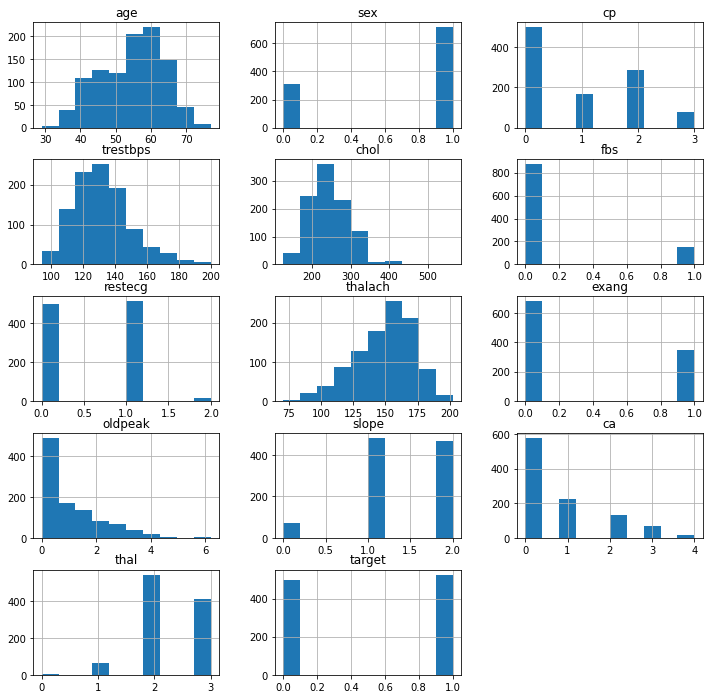

In [11]:
# Made by Priscila
# Histograms: here we can see the shape of each feature and provide the count of the number of observations.
df.hist(figsize=(12,12), layout=(5,3));

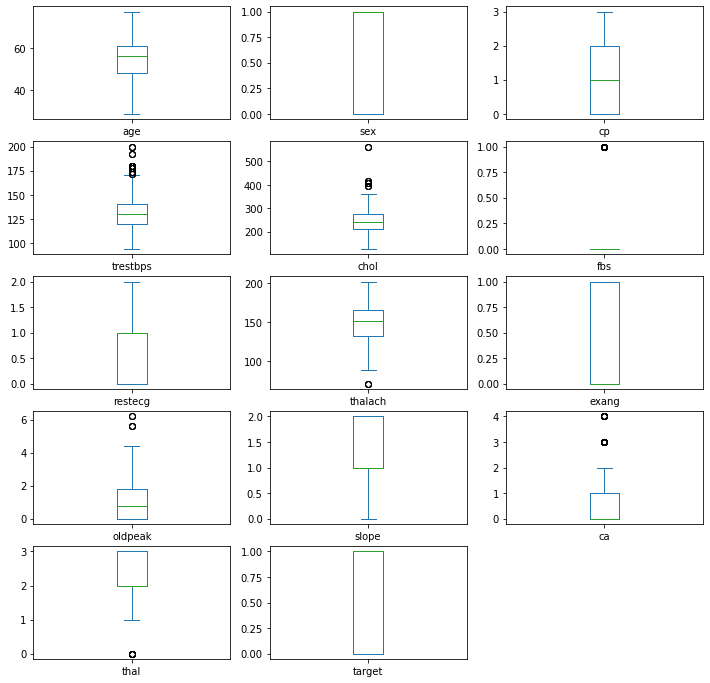

In [12]:
# Made by Priscila
# Box and Whiskers plot are useful to find out outliers in our data. 
# If we have more outliers we will have to remove them or fix them, otherwise they will become as noise for the training data.
df.plot(kind='box', subplots = True, layout=(5,3), figsize=(12,12 ))
plt.show()

 How we can see, there are outliers present in trtbps, chol, thalachh, oldpeak, ca, thall.

## **2.5 Lets remover the outliers using Z-score:**

In [13]:
# Made by Priscila
# Shape of the datast before remove the outliers
df.shape

(1025, 14)

In [14]:
# Made by Priscila
# Removing outliers using Z-score and print the new shape ot the dataset without the outliers.
z = np.abs(stats.zscore(df))
df1 = df[(z<3).all(axis=1)]
df1.shape

(969, 14)

## **2.6 The correlation between the features:**
**Lets analyze which feature is negatively correlated and which is positively correlated with following heatmaps:**

Text(0.5, 1.0, 'Pearson Correlation')

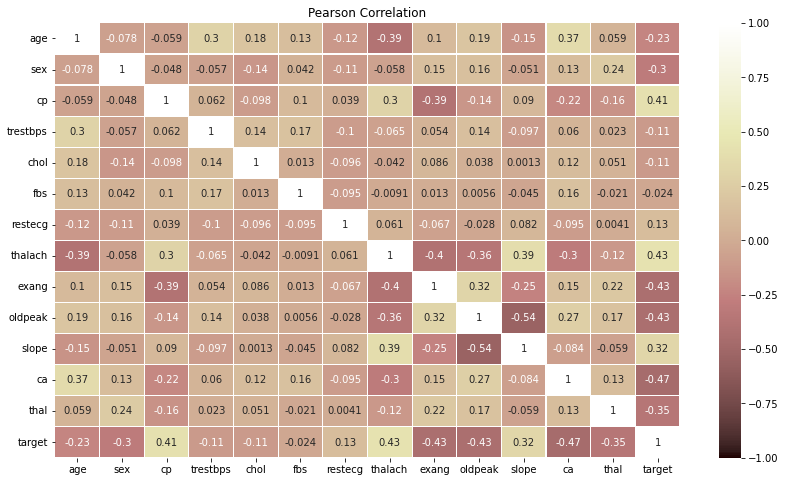

In [15]:
# Made by Priscila
# Pearson Correlation
#Finding the correlation between variables
pearsonCorr = df1.corr(method='pearson')
spearmanCorr = df1.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "pink", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

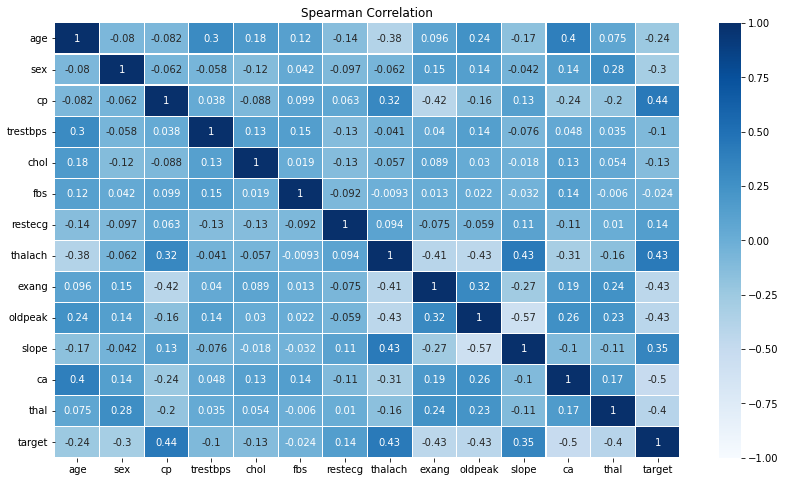

In [16]:
# Made by Marcelo Pugliesi
# Spearman Correlation
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

Made by Marcelo Pugliesi:

Correlation is a statistical term that indicates how closely two variables are related. It describes how one variable responds to a change in the other variable. A positive correlation exists when two variables increase or decrease in lockstep, whereas a negative correlation exists when one variable increases while the other decreases. If a change in one variable has no effect on another, the two variables have a zero correlation (Sereno, 2021). 

Which is better, Pearson or Spearman?
Pearson and Spearman are both used to measure correlation, but the difference is in the type of analysis we wish to do. Pearson correlation is a statistical method for determining the linear relationship between two continuous variables.

The monotonic relationship is evaluated using the Spearman correlation. Instead of using raw data, the Spearman correlation coefficient uses ranking values for each variable (Sereno, 2021).

**From both the heat maps, the features fbs, chol and trestbps have the lowest correlation with output.**

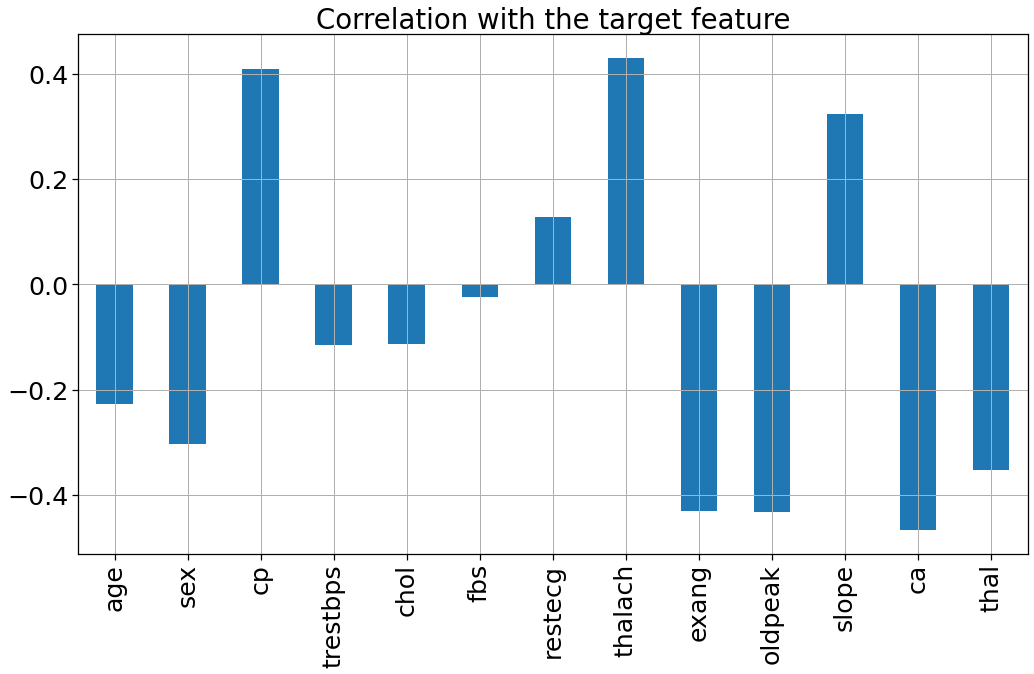

In [17]:
# Made by Priscila
# Correlation with the target feature
sns.set_context('notebook',font_scale = 2.3)
df1.drop('target', axis=1).corrwith(df1.target).plot(kind='bar', grid=True, figsize=(15, 10), 
title="Correlation with the target feature")
plt.tight_layout()

Made by Priscila

We can see that four features ( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature, while Other features are negatively correlated with the target feature. That means, these values have the highest influence on the result.
According to that the values the model will define if the patient has a disease or not.

# **2.7 Percentage of Patients with or without Heart Disease in our Dataset**

In [19]:
## Made by Marcelo and Washington 
countNoDisease = len(df1[df1.target == 0])
countHaveDisease = len(df1[df1.target == 1])
print("Percentage of Patients without Heart Disease: {:.2f}%".format((countNoDisease / (len(df1.target))*100)))
print("Percentage of Patients with Heart Disease: {:.2f}%".format((countHaveDisease / (len(df1.target))*100)))

Percentage of Patients without Heart Disease: 48.19%
Percentage of Patients with Heart Disease: 51.81%



## **2.8 Heart Disease Frequency by Age**

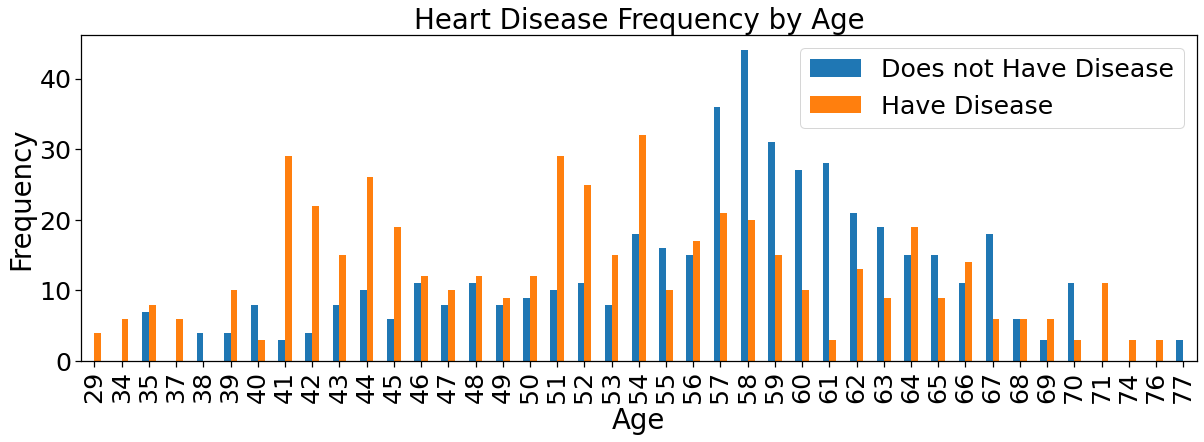

In [21]:
## Made by Marcelo, Washington, and Priscila
pd.crosstab(df1.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Does not Have Disease", "Have Disease"])
plt.savefig('heartDiseaseAndAges.png')
plt.show()

We can see that the group of people between 41 and 60 years old are more likely to have heart disease, specially between 51 and 54 yeas old.

# **2.9 Features Mean values by target ( 0 = no disease, 1 = have disease)**

In [22]:
## Made by Marcelo and Washington
df1.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.554604,0.845824,0.509636,133.004283,249.837259,0.152034,0.462527,139.244111,0.548180,1.523555,1.194861,1.130621,2.541756
1,52.430279,0.567729,1.356574,129.115538,239.472112,0.135458,0.597610,158.671315,0.141434,0.579681,1.587649,0.262948,2.123506


# **2.10 Sex Feature Analysis:**

In [23]:
# Made by Priscila, Marcelo and Washington 
# Males= 1 Female= 0
countFemale = len(df1[df1.sex == 0])
countMale = len(df1[df1.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(df1.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(df1.sex))*100))
df1['sex'].value_counts()

Percentage of Female Patients:29.82%
Percentage of Male Patients:70.18%


1    680
0    289
Name: sex, dtype: int64

# **2.11 Heart Disease Frequency for male and female**

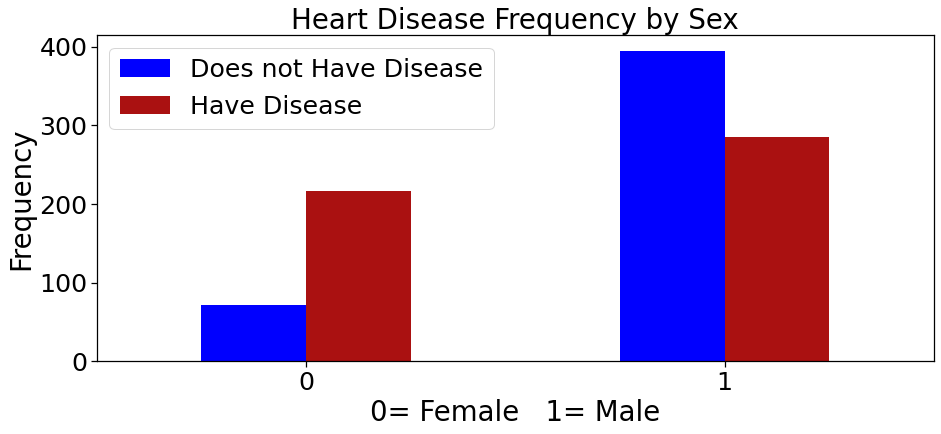

In [24]:
## Made by Marcelo and Washington

pd.crosstab(df1.sex,df1.target).plot(kind="bar",figsize=(15,6),color=['blue', '#AA1111' ])
plt.title('Heart Disease Frequency by Sex')
plt.xlabel('0= Female   1= Male')
plt.xticks(rotation=0)
plt.legend(["Does not Have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Despite the fact that the dataset contains more male patients, we can see that women have a higher risk of having a heart disease than males with our Dataset.**

## **2.12 Relation between Sex and Slope:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation between Sex and Slope - Female= 0 Male= 1')

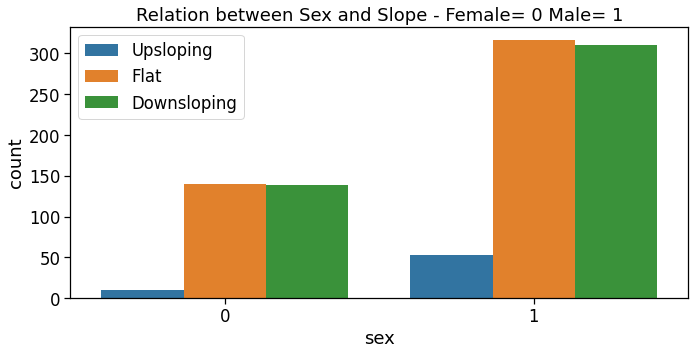

In [25]:
# Made by Priscila
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df1['sex'],hue=df1["slope"])
plt.legend(["Upsloping", "Flat", "Downsloping"])
plt.tight_layout()
plt.title("Relation between Sex and Slope - Female= 0 Male= 1")

Made by Marcelo Pugliesi

The ST segment shift relative to exercise-induced increments in heart rate, the ST/heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) (Finkelhor et al., 1986).

According to concluded studies the maximal ST/HR slope can be used reliably to predict the presence or absence and the severity of coronary artery disease in individual patients with anginal pain, whether they are on beta-blocker therapy or not (KARDASH et al., 1982).

ST depression can be either upsloping, downsloping, or Flat/horizontal.
Flat/Horizontal or downsloping ST depression ≥ 0.5 mm at the J-point in ≥ 2 contiguous leads indicates myocardial ischaemia (Buttner, 2022).

**In our Dataset it is clear that Male and Female are suffering from myocardial ischaemia.**


## **2.13 Chest Pain Type Analysis:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '0:Typical Angina  1:Atypical Angina  2:Non-Anginal Pain  3:Asymptomatic')

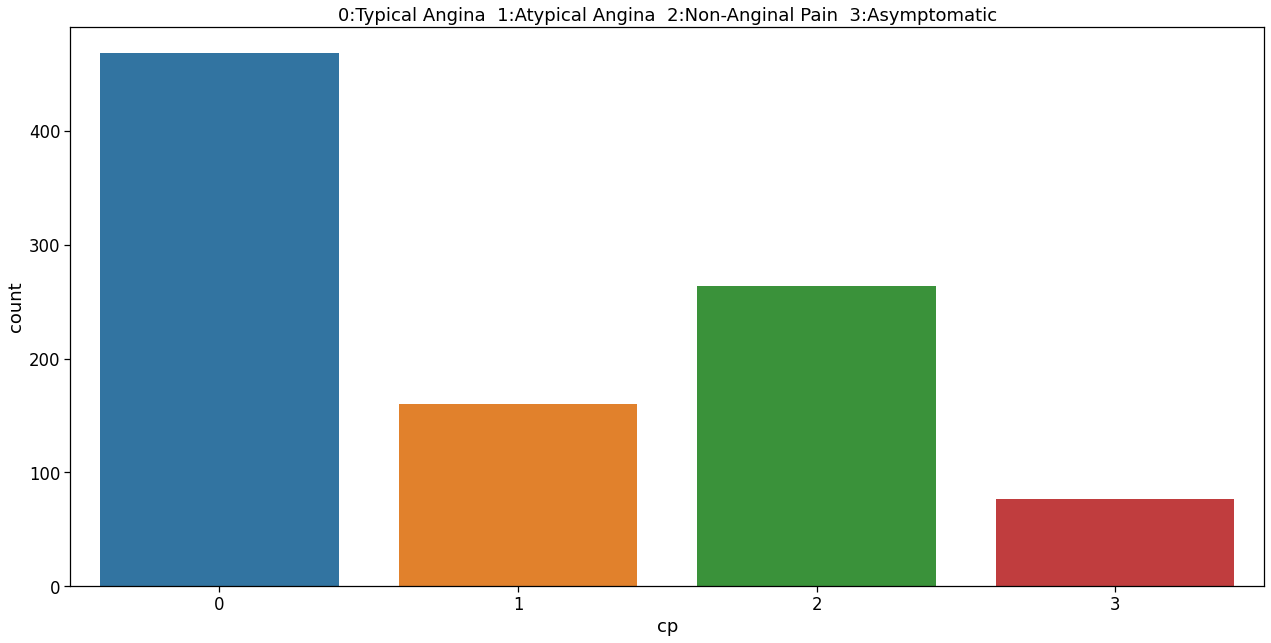

In [26]:
# Made by Priscila
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df1['cp'])
plt.tight_layout()
plt.title("0:Typical Angina  1:Atypical Angina  2:Non-Anginal Pain  3:Asymptomatic")

Made by Marcelo Pugliesi

**Typical (classic) angina** chest pain consists of (1) Substernal chest pain or discomfort that is (2) Provoked by exertion or emotional stress and (3) relieved by rest or nitroglycerine (or both). **Atypical (probable) angina** chest pain applies when 2 out of 3 criteria of classic angina are present.
**Non-specific chest pain**: If ≤ 1 of the criteria of classic angina is present, symptoms are classified as non-specific. Typical chest pain is also called definite angina, classic angina, or typical angina. Atypical chest pain is also called atypical/probable angina. Non-specific chest pain is also called non-ischemic chest discomfort (Hermann 1 et al., 2010).

As we can see the number of patients with Typical Angina are by far the majority of the cases, followed by the Non-Anginal Pain. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation between CP and Target')

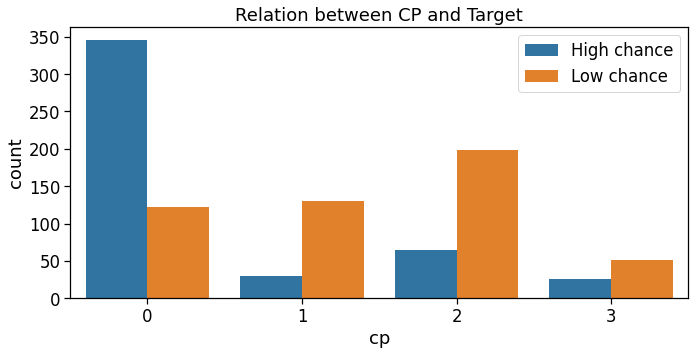

In [27]:
# Made by Priscila
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df1['cp'],hue=df1["target"])
plt.legend(["High chance", "Low chance"])
plt.tight_layout()
plt.title("Relation between CP and Target")

As we can see above, patients with Typical Angina have a higher chance to have heart disease. Typical Angina is one indication of coronary artery disease.


# **2.14**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


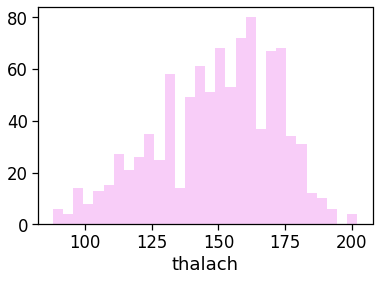

In [28]:
# 
sns.distplot(df1['thalach'],kde=False,bins=30,color='violet')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

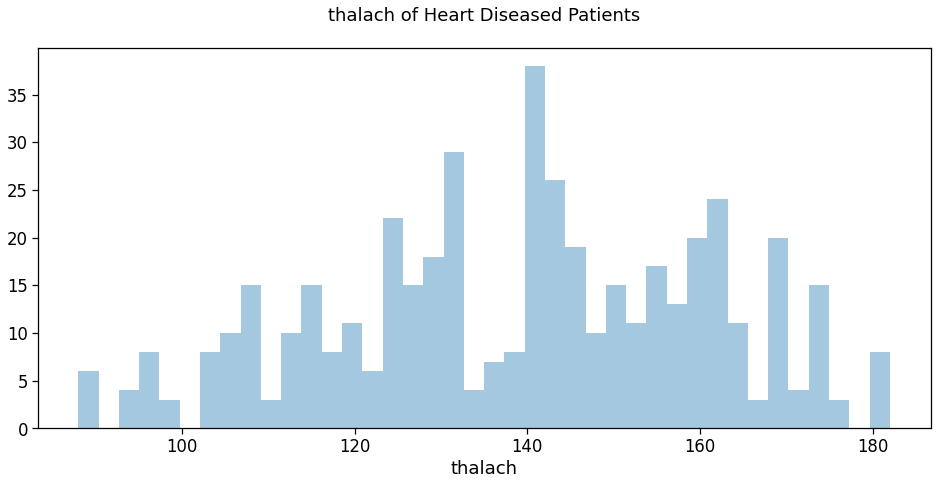

In [29]:
plt.figure(figsize=(16,7))
sns.distplot(df1[df1['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

# **2.15 Cholesterol level in Patients with Heart Disease**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cholesterol level in Patients with Heart Disease')

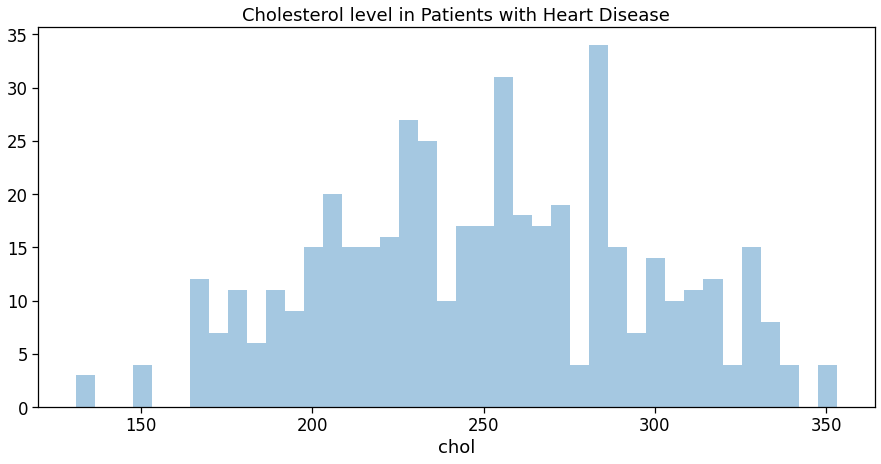

In [36]:
## Made by Marcelo and Priscila
plt.figure(figsize=(15,7))
sns.distplot(df1[df1['target']==0]['chol'],kde=False,bins=40)
plt.title('Cholesterol level in Patients with Heart Disease')

Made by Marcelo Pugliesi

Excess lipids (fatty substances such as cholesterol and triglycerides), particularly LDL cholesterol, cause fatty deposits to accumulate within your arteries, limiting or stopping blood and oxygen flow to your heart. When total cholesterol levels reach 240 mg/dl or above, the risk of cardiovascular disease skyrockets. The Goal is to keep total Cholasterol under 200 mg/dl (Preventing & Reversing Cardiovascular Disease, 2018).

In [ ]:
## Made by Marcelo and Washington  Explicar esse codigo
# Assigning levels to categories
list = []
for i in range(0,df.shape[1]):
  if(df1.iloc[:,i].dtypes == 'object'):
    df1.iloc[:,i] = pd.Categorical(df.iloc[:,i])
    df1.iloc[:,i] = df1.iloc[:,i].cat.codes
    df1.iloc[:,i] = df1.iloc[:,i].astype('object')
    list.append(df1.columns[i])


# **3. Model preparation**
Fase 4 of CRISP-DM

In [ ]:
# Made by Priscila, Marcelo and Ariane 
y = df1["target"]
X = df1.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
# Made by Priscila, Marcelo and Ariane 
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 376, 1: 399})

In [ ]:
# Made by Priscila, Marcelo and Ariane 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ML Models

Here we take different machine learning algorithms and try to find the algorithm which predict more accurately.

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine

In [ ]:
# Made by Priscila, Marcelo and Ariane 
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)
    report

In [ ]:
# Made by Priscila, Marcelo and Ariane 
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))


confussion matrix
[[75 16]
 [ 9 94]]


Accuracy of Logistic Regression: 87.11340206185567 

              precision    recall  f1-score   support

           0       0.89      0.82      0.86        91
           1       0.85      0.91      0.88       103

    accuracy                           0.87       194
   macro avg       0.87      0.87      0.87       194
weighted avg       0.87      0.87      0.87       194



Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        91
           1       0.85      0.91      0.88       103

    accuracy                           0.87       194
   macro avg       0.87      0.87      0.87       194
weighted avg       0.87      0.87      0.87       194



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


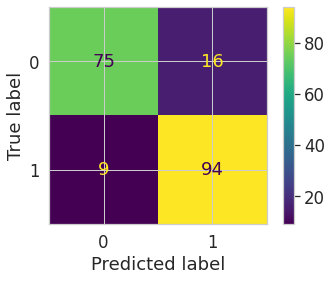

In [ ]:
# Made by Priscila, Marcelo and Ariane 
print('Logistic Regression')
report(lr)

confussion matrix
[[75 16]
 [10 93]]


Accuracy of Naive Bayes model: 86.5979381443299 

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        91
           1       0.85      0.90      0.88       103

    accuracy                           0.87       194
   macro avg       0.87      0.86      0.86       194
weighted avg       0.87      0.87      0.87       194

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        91
           1       0.85      0.90      0.88       103

    accuracy                           0.87       194
   macro avg       0.87      0.86      0.86       194
weighted avg       0.87      0.87      0.87       194



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


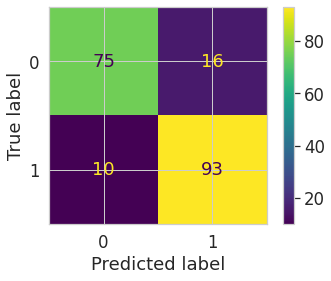

In [ ]:
# Made by Priscila, Marcelo and Ariane 
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))
report(nb)

confussion matrix
[[86  5]
 [ 7 96]]


Accuracy of Random Forest: 93.81443298969072 

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        91
           1       0.95      0.93      0.94       103

    accuracy                           0.94       194
   macro avg       0.94      0.94      0.94       194
weighted avg       0.94      0.94      0.94       194

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        91
           1       0.95      0.93      0.94       103

    accuracy                           0.94       194
   macro avg       0.94      0.94      0.94       194
weighted avg       0.94      0.94      0.94       194



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


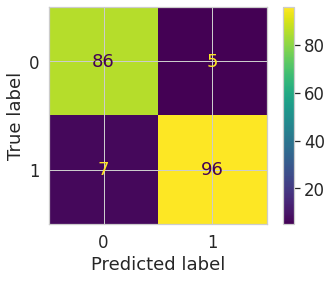

In [ ]:
# Made by Priscila, Marcelo and Ariane 
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))
report(rf)

In [ ]:
# Made by Priscila, Marcelo and Ariane 
import xgboost as xgb
from xgboost import XGBClassifier

confussion matrix
[[78 13]
 [ 8 95]]


Accuracy of Extreme Gradient Boost: 89.17525773195877 

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        91
           1       0.88      0.92      0.90       103

    accuracy                           0.89       194
   macro avg       0.89      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        91
           1       0.88      0.92      0.90       103

    accuracy                           0.89       194
   macro avg       0.89      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


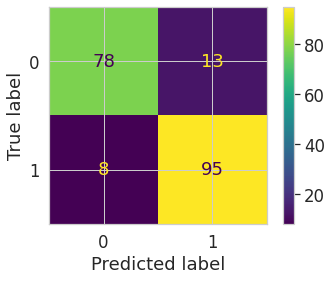

In [ ]:
# Made by Priscila, Marcelo and Ariane 
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))
report(xgb)

confussion matrix
[[80 11]
 [13 90]]


Accuracy of K-NeighborsClassifier: 87.62886597938144 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        91
           1       0.89      0.87      0.88       103

    accuracy                           0.88       194
   macro avg       0.88      0.88      0.88       194
weighted avg       0.88      0.88      0.88       194

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        91
           1       0.89      0.87      0.88       103

    accuracy                           0.88       194
   macro avg       0.88      0.88      0.88       194
weighted avg       0.88      0.88      0.88       194



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


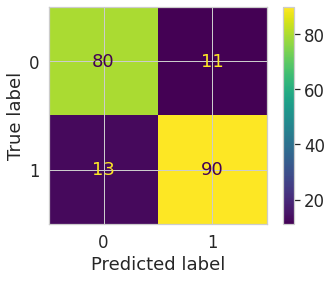

In [ ]:
# Made by Priscila, Marcelo and Ariane 
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))
report(knn)

confussion matrix
[[91  0]
 [ 7 96]]


Accuracy of DecisionTreeClassifier: 96.3917525773196 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        91
           1       1.00      0.93      0.96       103

    accuracy                           0.96       194
   macro avg       0.96      0.97      0.96       194
weighted avg       0.97      0.96      0.96       194

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        91
           1       1.00      0.93      0.96       103

    accuracy                           0.96       194
   macro avg       0.96      0.97      0.96       194
weighted avg       0.97      0.96      0.96       194



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


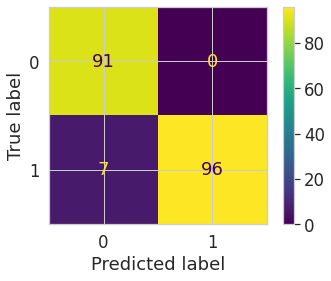

In [ ]:
# Made by Priscila, Marcelo and Ariane 
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))
report(dt)

confussion matrix
[[ 89   2]
 [  2 101]]


Accuracy of Support Vector Classifier: 97.9381443298969 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.98      0.98      0.98       103

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.98      0.98      0.98       103

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


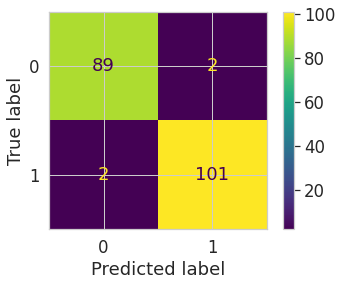

In [ ]:
# Made by Priscila, Marcelo and Ariane 
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))
report(svc)

In [ ]:
# Made by Priscila, Marcelo and Ariane 
from xgboost import XGBClassifier, plot_importance



In [ ]:
# Made by Priscila, Marcelo and Ariane 
!pip install scikit-learn

In [ ]:
# Made by Priscila, Marcelo and Ariane 
from sklearn.metrics import roc_curve, auc

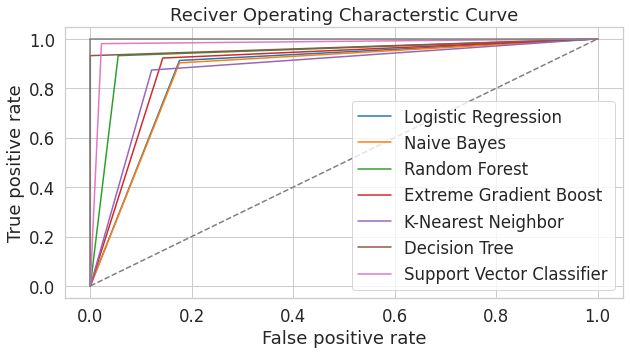

In [ ]:
# Made by Priscila, Marcelo and Ariane 
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **4. Model Evaluation**
Fase 5 of CRISP-DM

In [ ]:
# Made by Priscila, Marcelo and Ariane 
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,87.113402
1,Naive Bayes,86.597938
2,Random Forest,93.814433
3,Extreme Gradient Boost,89.175258
4,K-Nearest Neighbour,87.628866
5,Decision Tree,96.391753
6,Support Vector Machine,97.938144


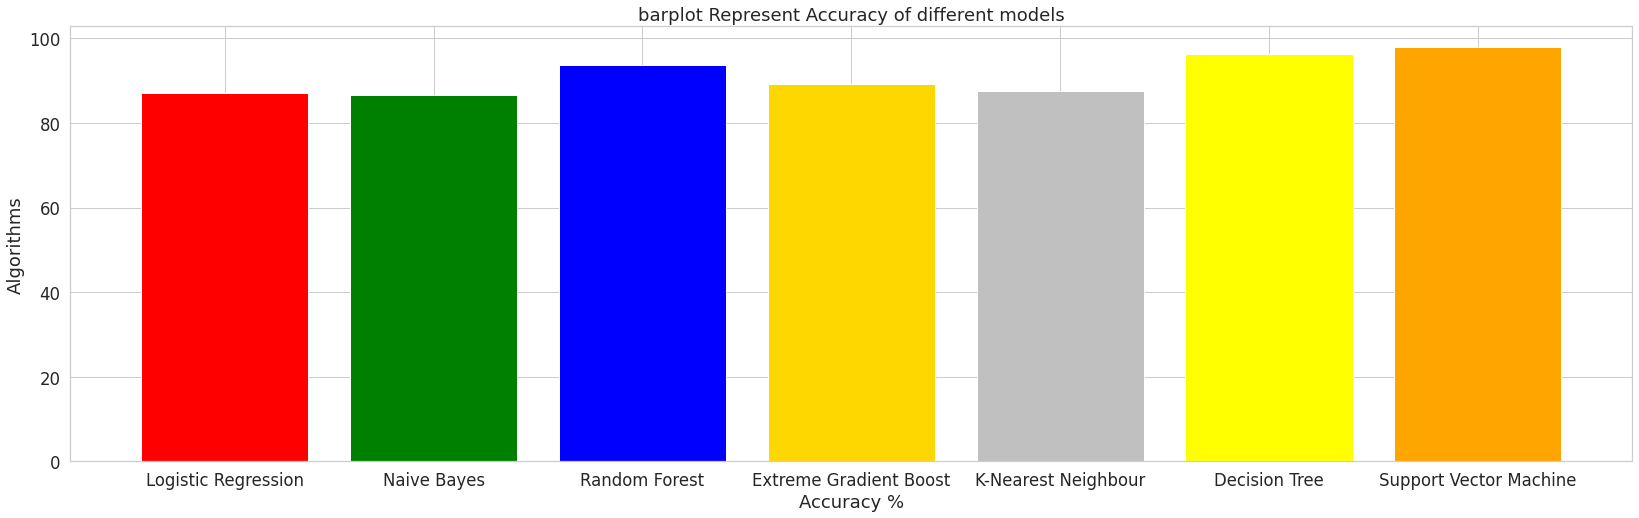

In [ ]:
# Made by Priscila, Marcelo and Ariane 
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(28,8))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# **5. Deployment**
Fase 6 of CRISP-DM

In [ ]:
## Exporting the model to be executed in our Web application
from joblib import dump

svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)

dump(svc, 'heart_disease.joblib')

['heart_disease.joblib']

## **References:**

Lapp, D., 2019. Heart Disease Dataset. [online] Kaggle.com. Available at: <https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset> [Accessed 14 May 2022].

Sereno, S., 2021. Comparison of Pearson and Spearman correlation coefficients. [online] Analytics Vidhya. Available at: <https://www.analyticsvidhya.com/blog/2021/03/comparison-of-pearson-and-spearman-correlation-coefficients/> [Accessed 14 May 2022].

Finkelhor, R., Newhouse, K., Vrobel, T., Miron, S. and Bahler, R., 1986. The ST segment/heart rate slope as a predictor of coronary artery disease: comparison with quantitative thallium imaging and conventional ST segment criteria. [online] Pubmed. Available at: <https://pubmed.ncbi.nlm.nih.gov/3739881/> [Accessed 15 May 2022].

Buttner, E., 2022. The ST Segment. [online] Life in the Fast Lane • LITFL. Available at: <https://litfl.com/st-segment-ecg-library/> [Accessed 15 May 2022].

Hermann 1, L., Weingart, S., Yoon, Y., Genes, N., Nelson, B., Shearer, P., Duvall, W. and Henzlova, M., 2010. Comparison of frequency of inducible myocardial ischemia in patients presenting to emergency department with typical versus atypical or nonanginal chest pain. [online] PubMed. Available at: <https://pubmed.ncbi.nlm.nih.gov/20494662/> [Accessed 15 May 2022].

Cleveland Clinic. 2018. Preventing & Reversing Cardiovascular Disease. [online] Available at: <https://my.clevelandclinic.org/health/articles/17385-cardiovascular-disease-prevention--reversal#:~:text=Total%20cholesterol%20less%20than%20200,multiple%20heart%20disease%20risk%20factors.> [Accessed 15 May 2022].